In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
df = pd.read_csv("national_MRA_clean.csv")
df

,date,location,vectorid,price,product,unit_quantity,unit,category
0,1995-01-01,Canada,v735165,10.17,Round steak,1.0,kilogram,Protein
1,1995-01-01,Canada,v735176,11.25,Sirloin steak,1.0,kilogram,Protein
2,1995-01-01,Canada,v735187,12.08,Prime rib roast,1.0,kilogram,Protein
3,1995-01-01,Canada,v735198,7.23,Blade roast,1.0,kilogram,Protein
4,1995-01-01,Canada,v735209,7.12,Stewing beef,1.0,kilogram,Protein
...,...,...,...,...,...,...,...,...
15649,2022-02-01,Canada,v735202,7.10,"Coffee, instant",200.0,grams,Beverages
15650,2022-02-01,Canada,v735203,4.49,Tea,72.0,bags,Beverages
15651,2022-02-01,Canada,v735204,4.45,Cooking or salad oil,1.0,litre,Oils
15652,2022-02-01,Canada,v735205,1.28,"Soup, canned",284.0,millilitres,Other_foods


In [57]:
from datetime import date

df['date_ordinal'] = pd.to_datetime(df['date']).apply(lambda date: date.toordinal())

In [58]:
df.describe()

,price,unit_quantity,date_ordinal
count,15654.000000,15654.000000,15654.000000
mean,4.439426,148.777294,733156.622014
std,4.614685,226.969813,2850.922756
min,0.580000,1.000000,728294.000000
25%,1.750000,1.000000,730667.000000
50%,2.910000,1.360000,733133.000000
75%,4.890000,284.000000,735630.000000
max,44.820000,796.000000,738187.000000


In [59]:
cdf = df[['date','price','product','category', 'date_ordinal']]
cdf

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
1,1995-01-01,11.25,Sirloin steak,Protein,728294
2,1995-01-01,12.08,Prime rib roast,Protein,728294
3,1995-01-01,7.23,Blade roast,Protein,728294
4,1995-01-01,7.12,Stewing beef,Protein,728294
...,...,...,...,...,...
15649,2022-02-01,7.10,"Coffee, instant",Beverages,738187
15650,2022-02-01,4.49,Tea,Beverages,738187
15651,2022-02-01,4.45,Cooking or salad oil,Oils,738187
15652,2022-02-01,1.28,"Soup, canned",Other_foods,738187


In [60]:
cdf.dtypes

date             object
price           float64
product          object
category         object
date_ordinal      int64
dtype: object

In [61]:
cdf['date'] = pd.to_datetime(df['date'])
cdf['product'].astype(str)
cdf['category'].astype(str)

cdf.dtypes

/var/folders/_l/rvfsqjvn4fl7npqhjz_rd08h0000gn/T/ipykernel_1375/458416524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['date'] = pd.to_datetime(df['date'])


date            datetime64[ns]
price                  float64
product                 object
category                object
date_ordinal             int64
dtype: object

In [62]:
cdf.head(52)

,date,price,product,category,date_ordinal
0,1995-01-01,10.17,Round steak,Protein,728294
1,1995-01-01,11.25,Sirloin steak,Protein,728294
2,1995-01-01,12.08,Prime rib roast,Protein,728294
3,1995-01-01,7.23,Blade roast,Protein,728294
4,1995-01-01,7.12,Stewing beef,Protein,728294
5,1995-01-01,3.73,Ground beef,Protein,728294
6,1995-01-01,8.36,Pork chops,Protein,728294
7,1995-01-01,4.90,Butt roast,Protein,728294
8,1995-01-01,3.72,Chicken,Protein,728294
9,1995-01-01,3.00,Bacon,Protein,728294


grouped = cdf.groupby(['category'])

protein = grouped.get_group("Protein")
beverages = grouped.get_group("Beverages")
dairy = grouped.get_group("Dairy")
grains = grouped.get_group("Grains")
veg_fruits = grouped.get_group("Veg_Fruits")
frozen = grouped.get_group("Frozen")
plant_based = grouped.get_group("Plant_based")
others = grouped.get_group("Other_foods")

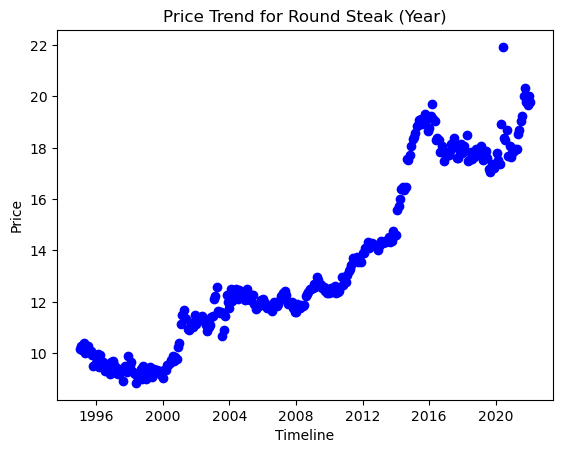

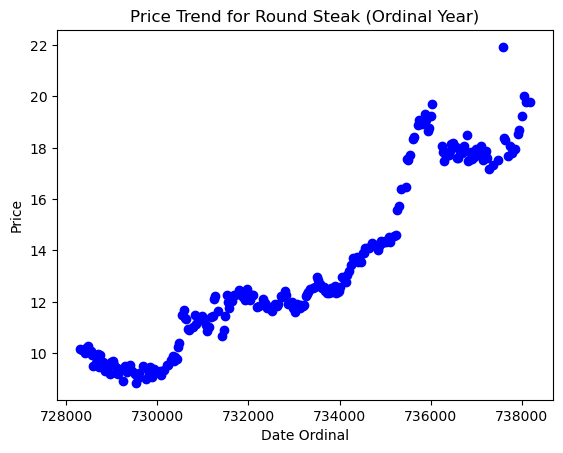

Coefficients:  [[0.00108547]]
Intercept:  [-782.46040522]
Mean absolute error: 0.93
Residual sum of squares (MSE): 1.31
R2-score: 0.89


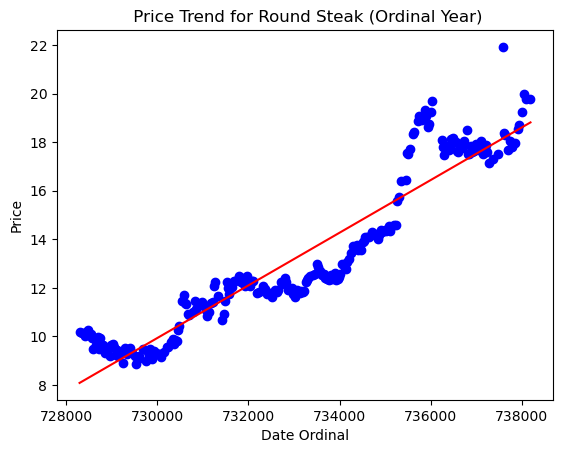

In [63]:
# Round Steak
r_s = cdf[(cdf['product'] == 'Round steak')]
plt.scatter(r_s.date, r_s.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Round Steak (Year)")
plt.show()

msk = np.random.rand(len(r_s)) < 0.8
train_r_s = r_s[msk]
test_r_s = r_s[~msk]

# Train distribution
plt.scatter(train_r_s.date_ordinal, train_r_s.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Round Steak (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_r_s[['date_ordinal']])
train_y = np.asanyarray(train_r_s[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_r_s.date_ordinal, train_r_s.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Round Steak (Ordinal Year)")

test_x = np.asanyarray(test_r_s[['date_ordinal']])
test_y = np.asanyarray(test_r_s[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

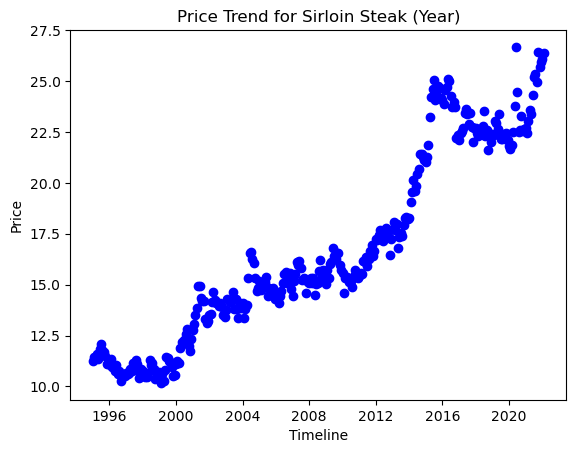

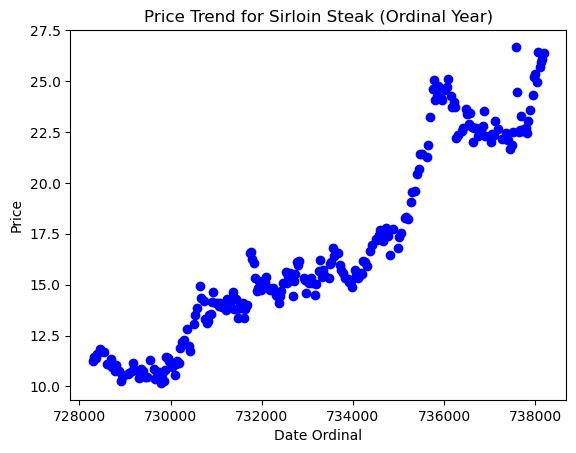

Coefficients:  [[0.00154638]]
Intercept:  [-1117.13770323]
Mean absolute error: 1.15
Residual sum of squares (MSE): 2.12
R2-score: 0.89


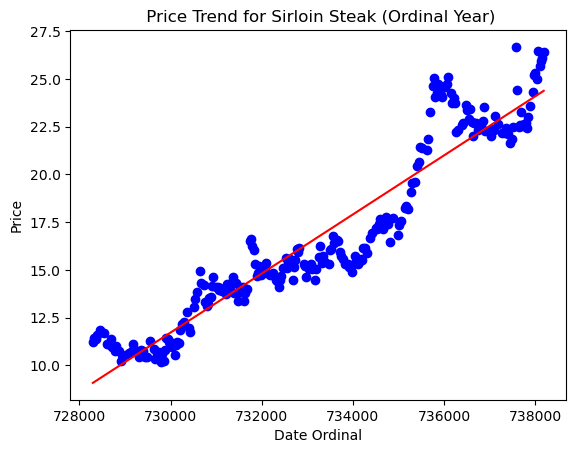

In [64]:
# Sirloin Steak
s_s = cdf[(cdf['product'] == 'Sirloin steak')]
plt.scatter(s_s.date, s_s.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Sirloin Steak (Year)")
plt.show()

msk = np.random.rand(len(s_s)) < 0.8
train_s_s = s_s[msk]
test_s_s = s_s[~msk]

# Train distribution
plt.scatter(train_s_s.date_ordinal, train_s_s.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Sirloin Steak (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_s_s[['date_ordinal']])
train_y = np.asanyarray(train_s_s[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_s_s.date_ordinal, train_s_s.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Sirloin Steak (Ordinal Year)")

test_x = np.asanyarray(test_s_s[['date_ordinal']])
test_y = np.asanyarray(test_s_s[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

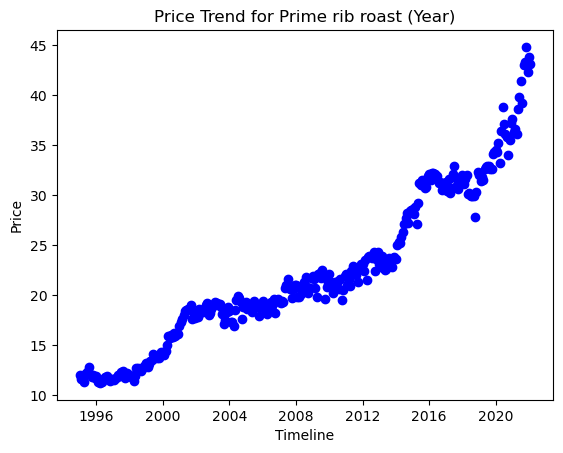

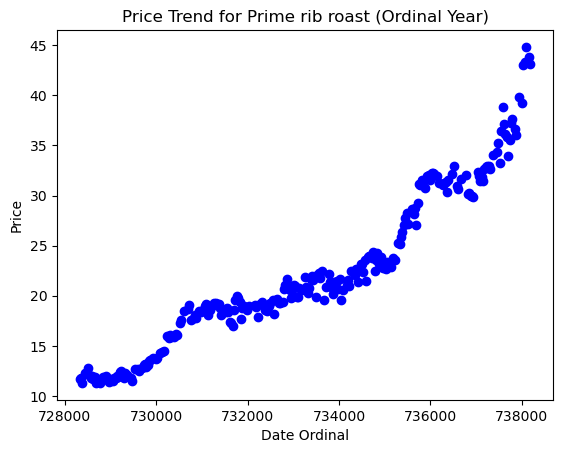

Coefficients:  [[0.00261979]]
Intercept:  [-1898.62833373]
Mean absolute error: 1.59
Residual sum of squares (MSE): 4.67
R2-score: 0.93


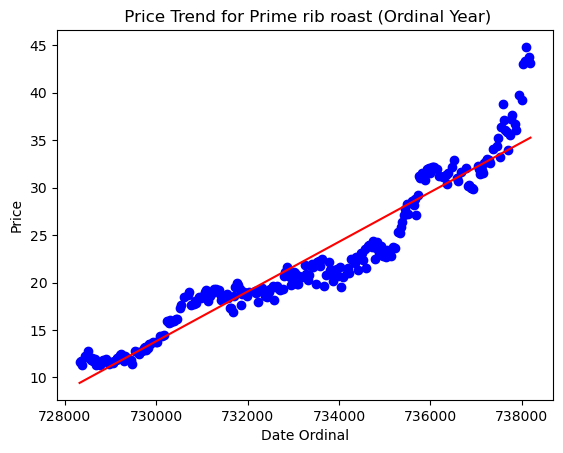

In [65]:
# Prime rib roast
p_r_r = cdf[(cdf['product'] == 'Prime rib roast')]
plt.scatter(p_r_r.date, p_r_r.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Prime rib roast (Year)")
plt.show()

msk = np.random.rand(len(p_r_r)) < 0.8
train_p_r_r = p_r_r[msk]
test_p_r_r = p_r_r[~msk]

# Train distribution
plt.scatter(train_p_r_r.date_ordinal, train_p_r_r.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Prime rib roast (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_p_r_r[['date_ordinal']])
train_y = np.asanyarray(train_p_r_r[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_p_r_r.date_ordinal, train_p_r_r.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Prime rib roast (Ordinal Year)")

test_x = np.asanyarray(test_p_r_r[['date_ordinal']])
test_y = np.asanyarray(test_p_r_r[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

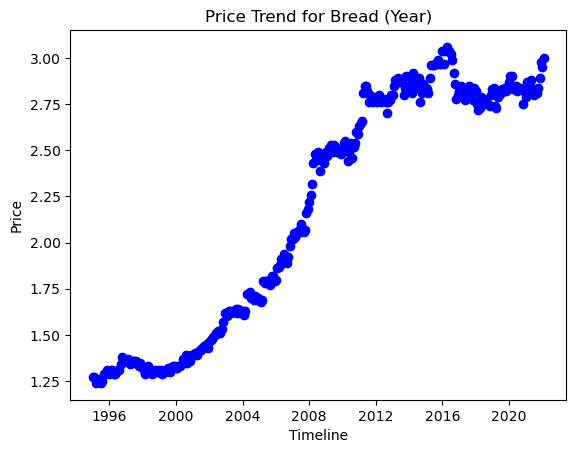

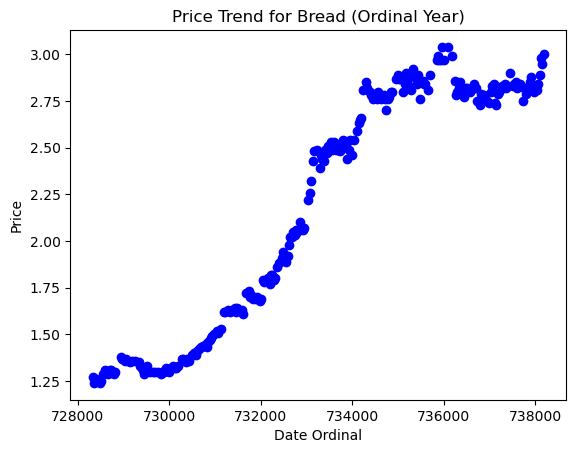

Coefficients:  [[0.00021179]]
Intercept:  [-153.12525886]
Mean absolute error: 0.18
Residual sum of squares (MSE): 0.04
R2-score: 0.91


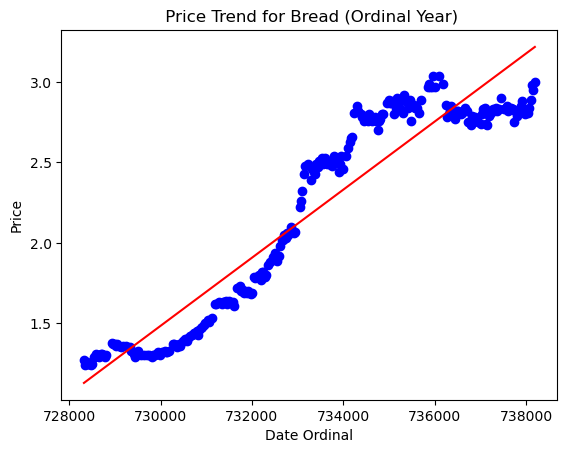

In [66]:
# Bread
b = cdf[(cdf['product'] == 'Bread')]
plt.scatter(b.date, b.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Bread (Year)")
plt.show()

msk = np.random.rand(len(b)) < 0.8
train_b = b[msk]
test_b = b[~msk]

# Train distribution
plt.scatter(train_b.date_ordinal, train_b.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Bread (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_b[['date_ordinal']])
train_y = np.asanyarray(train_b[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_b.date_ordinal, train_b.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Bread (Ordinal Year)")

test_x = np.asanyarray(test_b[['date_ordinal']])
test_y = np.asanyarray(test_b[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

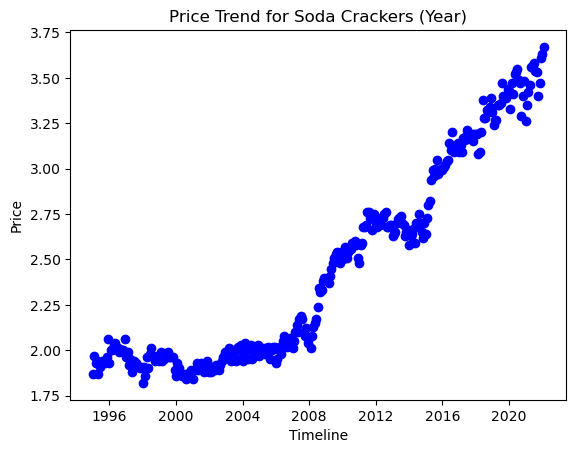

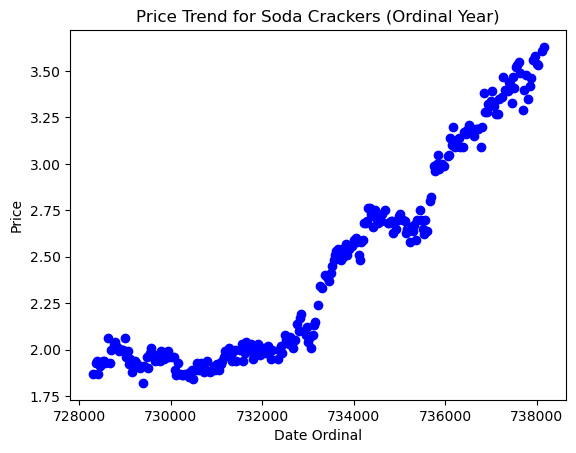

Coefficients:  [[0.00018127]]
Intercept:  [-130.44940181]
Mean absolute error: 0.82
Residual sum of squares (MSE): 1.40
R2-score: 0.40


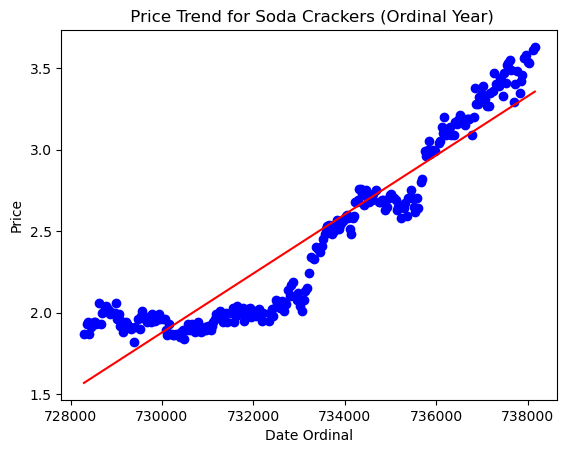

In [67]:
# Soda crackers
s_c = cdf[(cdf['product'] == 'Soda crackers')]
plt.scatter(s_c.date, s_c.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Soda Crackers (Year)")
plt.show()

msk = np.random.rand(len(s_c)) < 0.8
train_s_c = s_c[msk]
test_s_c = s_c[~msk]

# Train distribution
plt.scatter(train_s_c.date_ordinal, train_s_c.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Soda Crackers (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_s_c[['date_ordinal']])
train_y = np.asanyarray(train_s_c[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_s_c.date_ordinal, train_s_c.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Soda Crackers (Ordinal Year)")

test_x = np.asanyarray(test_h_m[['date_ordinal']])
test_y = np.asanyarray(test_h_m[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

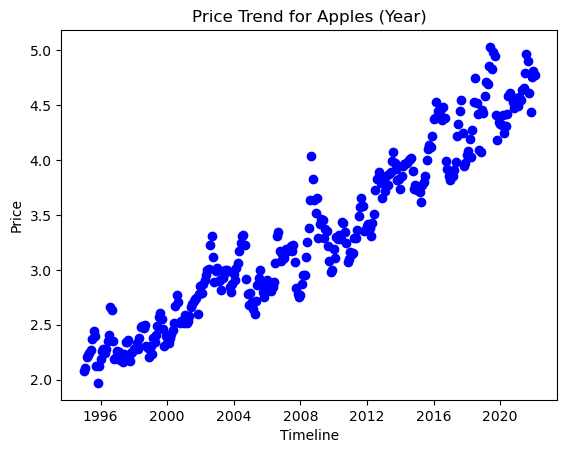

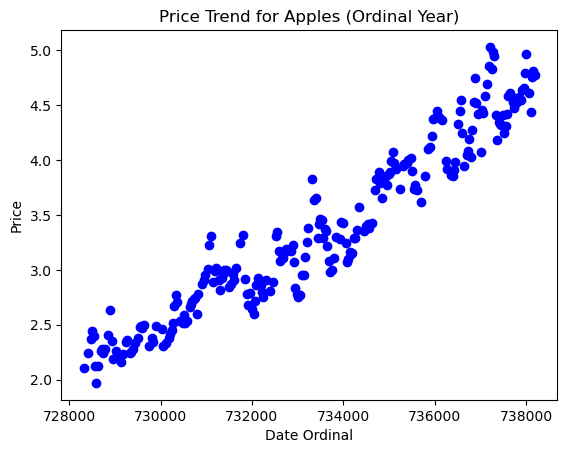

Coefficients:  [[0.00026371]]
Intercept:  [-190.03510606]
Mean absolute error: 0.18
Residual sum of squares (MSE): 0.05
R2-score: 0.91


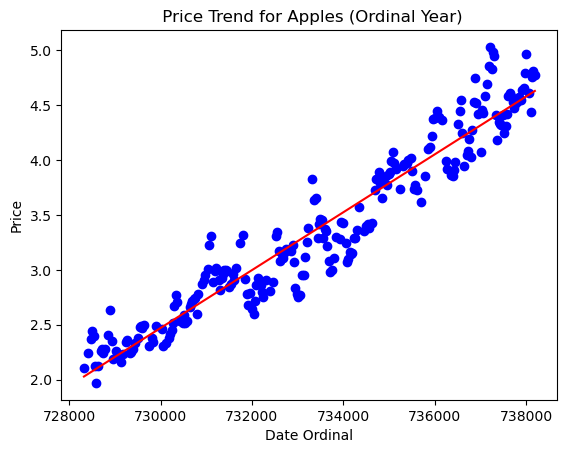

In [68]:
# Apples
a = cdf[(cdf['product'] == 'Apples')]
plt.scatter(a.date, a.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Apples (Year)")
plt.show()

msk = np.random.rand(len(a)) < 0.8
train_a = a[msk]
test_a = a[~msk]

# Train distribution
plt.scatter(train_a.date_ordinal, train_a.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Apples (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_a[['date_ordinal']])
train_y = np.asanyarray(train_a[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_a.date_ordinal, train_a.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Apples (Ordinal Year)")

test_x = np.asanyarray(test_a[['date_ordinal']])
test_y = np.asanyarray(test_a[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

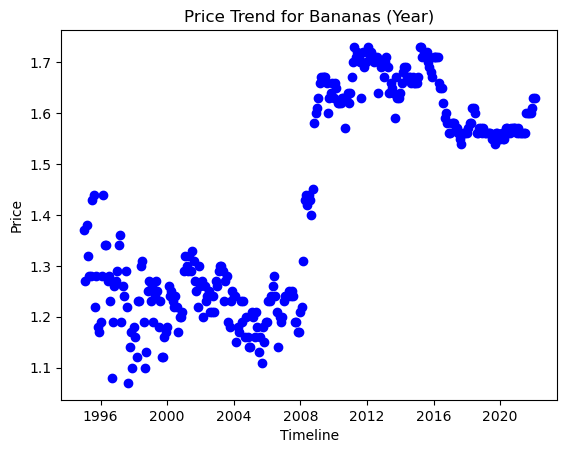

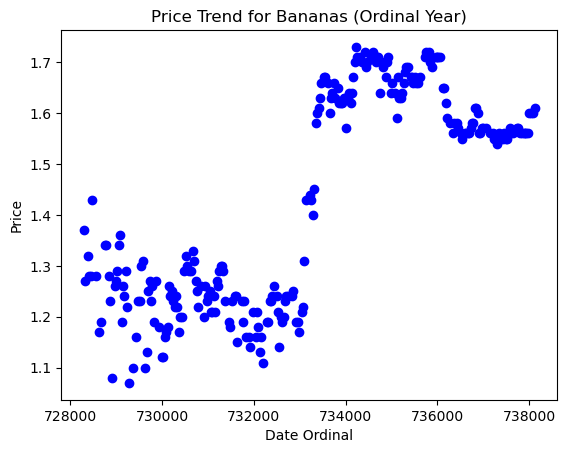

Coefficients:  [[5.69977412e-05]]
Intercept:  [-40.36094886]
Mean absolute error: 0.11
Residual sum of squares (MSE): 0.02
R2-score: 0.58


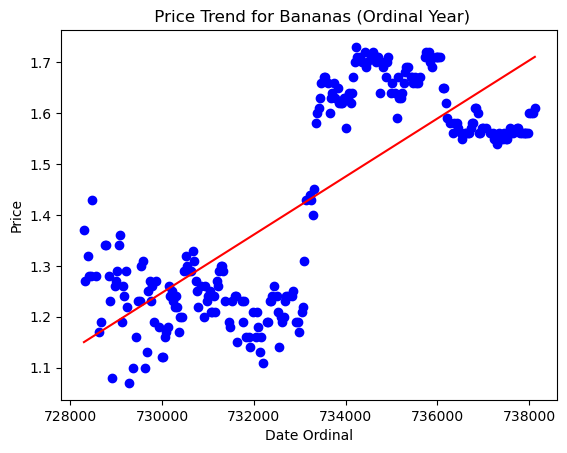

In [69]:
# Bananas
b = cdf[(cdf['product'] == 'Bananas')]
plt.scatter(b.date, b.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Bananas (Year)")
plt.show()

msk = np.random.rand(len(b)) < 0.8
train_b = b[msk]
test_b = b[~msk]

# Train distribution
plt.scatter(train_b.date_ordinal, train_b.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Bananas (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_b[['date_ordinal']])
train_y = np.asanyarray(train_b[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_b.date_ordinal, train_b.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Bananas (Ordinal Year)")

test_x = np.asanyarray(test_b[['date_ordinal']])
test_y = np.asanyarray(test_b[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

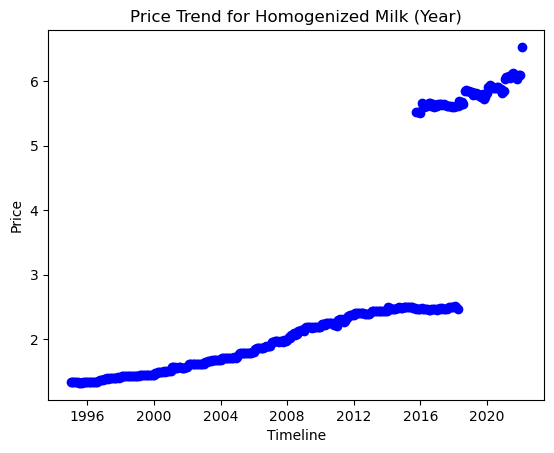

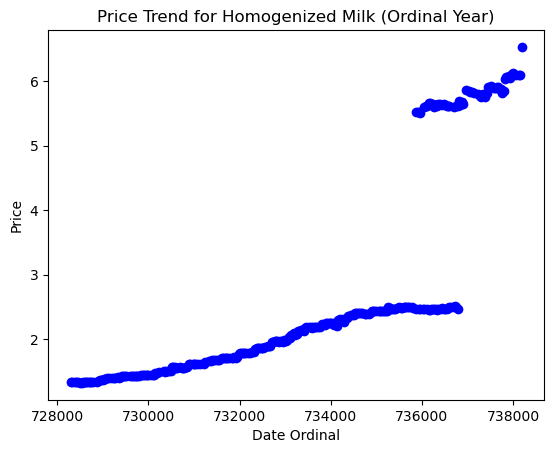

Coefficients:  [[0.00044482]]
Intercept:  [-323.56594944]
Mean absolute error: 0.86
Residual sum of squares (MSE): 1.06
R2-score: 0.67


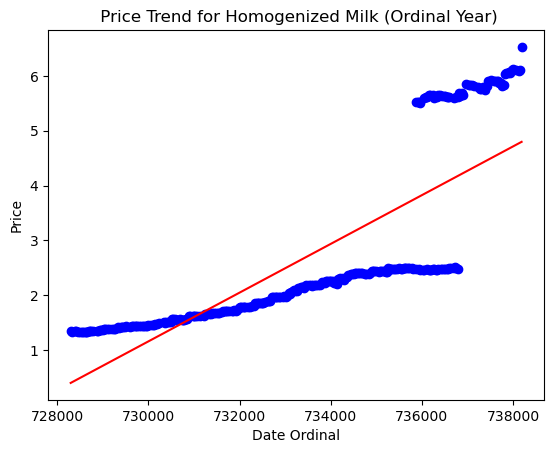

In [70]:
# Homogenized milk
h_m = cdf[(cdf['product'] == 'Homogenized milk')]
plt.scatter(h_m.date, h_m.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Homogenized Milk (Year)")
plt.show()

msk = np.random.rand(len(h_m)) < 0.8
train_h_m = h_m[msk]
test_h_m = h_m[~msk]

# Train distribution
plt.scatter(train_h_m.date_ordinal, train_h_m.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Homogenized Milk (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_h_m[['date_ordinal']])
train_y = np.asanyarray(train_h_m[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_h_m.date_ordinal, train_h_m.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Homogenized Milk (Ordinal Year)")

test_x = np.asanyarray(test_h_m[['date_ordinal']])
test_y = np.asanyarray(test_h_m[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))

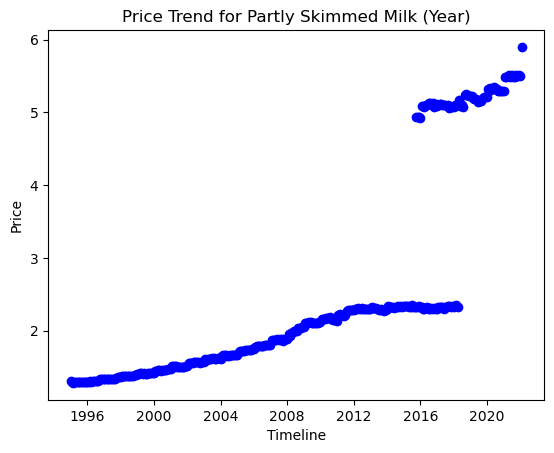

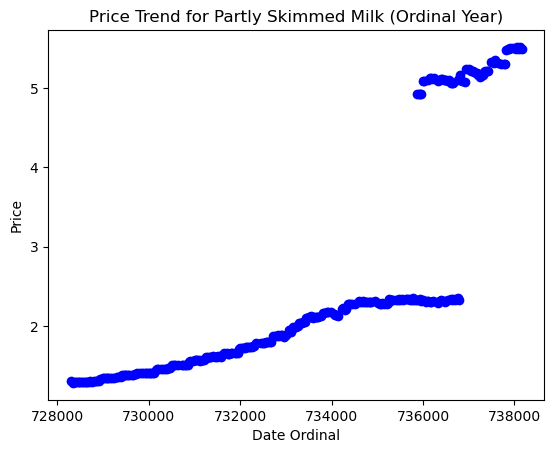

Coefficients:  [[0.00039466]]
Intercept:  [-286.9203459]
Mean absolute error: 0.75
Residual sum of squares (MSE): 0.76
R2-score: 0.67


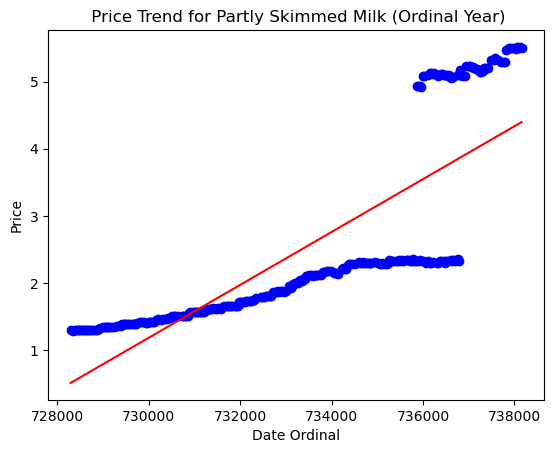

In [71]:
# Partly skimmed milk
p_s_m = cdf[(cdf['product'] == 'Partly skimmed milk')]
plt.scatter(p_s_m.date, p_s_m.price, color='blue')
plt.xlabel("Timeline")
plt.ylabel("Price")
plt.title("Price Trend for Partly Skimmed Milk (Year)")
plt.show()

msk = np.random.rand(len(p_s_m)) < 0.8
train_p_s_m = p_s_m[msk]
test_p_s_m = p_s_m[~msk]

# Train distribution
plt.scatter(train_p_s_m.date_ordinal, train_p_s_m.price, color='blue')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title("Price Trend for Partly Skimmed Milk (Ordinal Year)")
plt.show()

# Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_p_s_m[['date_ordinal']])
train_y = np.asanyarray(train_p_s_m[['price']])
regr.fit(train_x, train_y)

# Plot outputs 
plt.scatter(train_p_s_m.date_ordinal, train_p_s_m.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date Ordinal")
plt.ylabel("Price")
plt.title(" Price Trend for Partly Skimmed Milk (Ordinal Year)")

test_x = np.asanyarray(test_p_s_m[['date_ordinal']])
test_y = np.asanyarray(test_p_s_m[['price']])
test_y_ = regr.predict(test_x)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))